<a href="https://colab.research.google.com/gist/andreped/6070d1d2914a9ce5847d4b3e687188b7/aeropath-load-dataset-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q datasets nibabel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 18.1 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

# downloads data from Zenodo through the Hugging Face hub
# - might take several minutes (~5 minutes in CoLab)
# - when finished "num_rows" attribute should say '27', which is #CTs in dataset
dataset = load_dataset("andreped/AeroPath")
print(dataset)

data is downloaded to: /root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath


Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['ct', 'airways', 'lungs'],
        num_rows: 27
    })
})


In [6]:
# get paths of features (ct/airways/lungs) for a single patient
curr = dataset["test"][0]
print(curr)
print(curr["ct"])
print(curr["airways"])
print(curr["lungs"])

{'ct': '/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/27/27_CT_HR.nii.gz', 'airways': '/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/27/27_CT_HR_label_airways.nii.gz', 'lungs': '/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/27/27_CT_HR_label_lungs.nii.gz'}
/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/27/27_CT_HR.nii.gz
/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/27/27_CT_HR_label_airways.nii.gz
/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/27/27_CT_HR_label_lungs.nii.gz


In [3]:
# list all available patients and corresponding features (ct/airways/lungs)
for d in dataset["test"]:
  print(d)

{'ct': '/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/27/27_CT_HR.nii.gz', 'airways': '/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/27/27_CT_HR_label_airways.nii.gz', 'lungs': '/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/27/27_CT_HR_label_lungs.nii.gz'}
{'ct': '/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/11/11_CT_HR.nii.gz', 'airways': '/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/11/11_CT_HR_label_airways.nii.gz', 'lungs': '/root/.cache/huggingface/datasets/downloads/extracted/82e015b5035df201d219a016ad125b705923607047b3718868f261d90564c8b0/AeroPath/11/11_CT_HR_label_lungs.nii

CT: (417, 417, 362) int32
Airways: (417, 417, 362) uint8
Lungs: (417, 417, 362) uint8


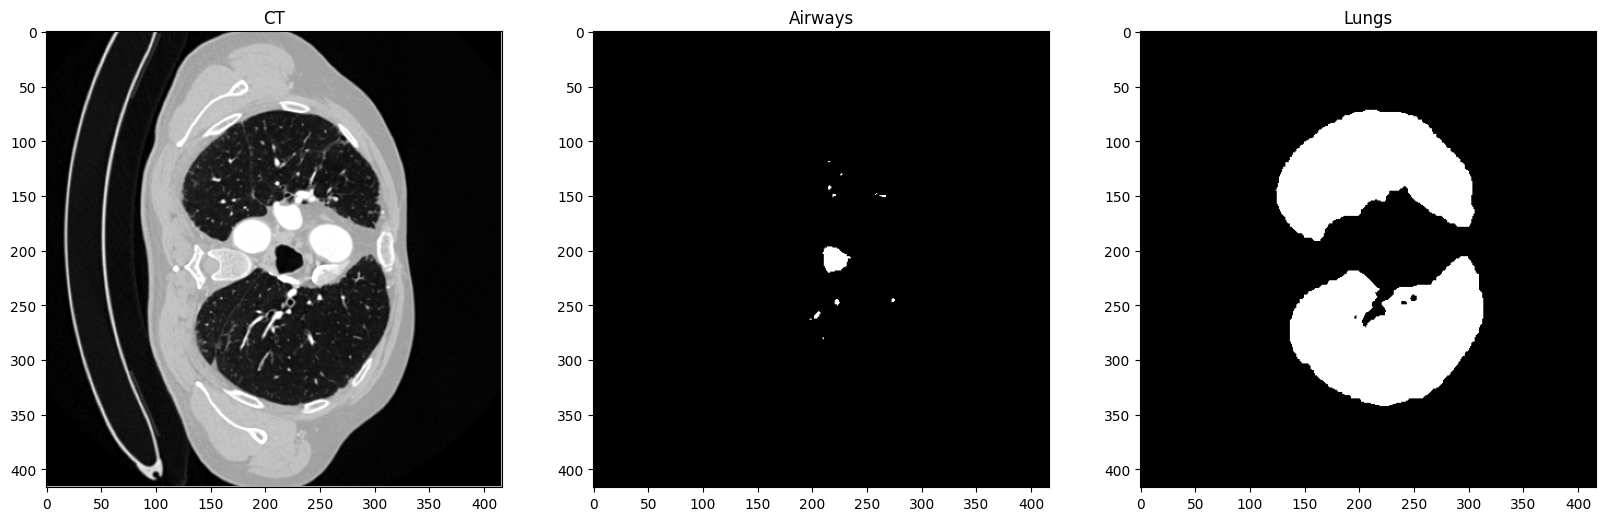

In [4]:
import nibabel as nib
import matplotlib.pyplot as plt

from nibabel.processing import resample_to_output

# load CT, airways, and lungs to numpy arrays for one patient
patient_1 = dataset["test"][0]
slice_nr = 250

ct_image = nib.load(patient_1["ct"])
ct_image = resample_to_output(ct_image, order=1)
ct_data = ct_image.get_fdata().astype("int32")

print("CT:", ct_data.shape, ct_data.dtype)

airways_image = nib.load(patient_1["airways"])
airways_image = resample_to_output(airways_image, order=0)
airways_data = airways_image.get_fdata().astype("uint8")

print("Airways:", airways_data.shape, airways_data.dtype)

lungs_image = nib.load(patient_1["lungs"])
lungs_image = resample_to_output(lungs_image, order=0)
lungs_data = lungs_image.get_fdata().astype("uint8")

print("Lungs:", lungs_data.shape, lungs_data.dtype)

# HU-clip CT for better contrast
ct_data[ct_data < -1024] = -1024
ct_data[ct_data > 400] = 400

# plot corresponding CT, Airways, and Lungs for a single 2D slide side-by-side
fig, ax = plt.subplots(1, 3, figsize=(20, 12))
ax[0].imshow(ct_data[..., slice_nr], cmap="gray")
ax[1].imshow(airways_data[..., slice_nr], cmap="gray")
ax[2].imshow(lungs_data[..., slice_nr], cmap="gray")

for i, title in enumerate(["CT", "Airways", "Lungs"]):
  ax[i].set_title(title)
plt.show()